# Predictive Model Building

---

#### Build a Predictive Model that can recognize a given vendor's invoice/format.  If it cannot recognize it as one that is currently set up in the system, classify it as Unrecognized.  If it is not an invoice, classify it as such (delivery ticket, services provided documentation, etc).  If it recognizes the invoice/format as one already setup in the system, classify it as the correct vendor's invoice/format.


Classes:

    1. Vendor (Home Depot, Staples, FedEx, etc.)
    
    2. Not an Invoice
    
    3. Unrecognized
        a. User to be prompted later on to Provide the Invoice/Format's Vendor, and its ROI's.
        b. User will also have option of designating given page as "Not an Invoice"

What would be my X's?

In [1]:
import pdftotext as ptt
import PIL
import pandas as pd

try:
    from PIL import Image
except ImportError:
    import Image

import pytesseract

invoice = '/Users/KevinWAguiar/Desktop/invoice2data/invoice2data/invoice2data/test/compare/p09-1.png'
invoice_2 = '/Users/KevinWAguiar/Desktop/invoice2data/invoice2data/invoice2data/test/compare/p10-1.png'
invoice_3 = '/Users/KevinWAguiar/Desktop/invoice2data/invoice2data/invoice2data/test/compare/10169400 - 20171023 (1)-57.png'

import numpy as np
from PIL import Image
img = Image.open(invoice)
#area = (400, 400, 800, 800)
#cropped_img = img.crop(area)
#cropped_img.show()

#invoice_crop = '/Users/KevinWAguiar/Desktop/Screen Shot 2019-01-26 at 1.06.54 PM.png'

#print(pytesseract.image_to_string(Image.open(invoice)))

import cv2

img = cv2.imread(invoice)
img_2 = cv2.imread(invoice_2)
img_3 = cv2.imread(invoice_3)

In [7]:
basewidth = 300
img = Image.open(invoice)
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)

In [8]:
#img.save('resized_image.png')

In [9]:
invoice = '/Users/KevinWAguiar/Desktop/GA_DSI/Capstone_Project/resized_image.png'


img = cv2.imread(invoice)

len(list(img.flatten()))

349200

In [10]:
type(img.flatten())

numpy.ndarray

In [14]:
img_flat = img.flatten()

In [16]:
len(img_flat)

349200

In [ ]:
pd.DataFrame(a.reshape(-1, len(a)),columns=columns)

In [18]:
pd.DataFrame(img_flat.reshape(-1, len(img_flat)))

,0,1,2,3,4,5,6,7,8,9,...,349190,349191,349192,349193,349194,349195,349196,349197,349198,349199
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


---

# Resize Image and Dump into DataFrame row:

In [2]:
import PIL
import numpy as np

invoice = '/Users/KevinWAguiar/Desktop/invoice2data/invoice2data/invoice2data/test/compare/p09-1.png'
invoice_2 = '/Users/KevinWAguiar/Desktop/invoice2data/invoice2data/invoice2data/test/compare/p10-1.png'
invoice_3 = '/Users/KevinWAguiar/Desktop/invoice2data/invoice2data/invoice2data/test/compare/10169400 - 20171023 (1)-57.png'

img_PIL = Image.open(invoice)

In [3]:
basewidth = 300
wpercent = (basewidth / float(img_PIL.size[0]))
hsize = int((float(img_PIL.size[1]) * float(wpercent)))
img_PIL = img_PIL.resize((basewidth, hsize), PIL.Image.ANTIALIAS)#
#img

In [4]:
img_PIL.size[0]

300

In [5]:
img_PIL.size[1]

388

In [ ]:
img_PIL

In [ ]:
len(np.array(img_PIL[1]))

---

## reshape using cv2, then get size of array/features

---

For example, this will resize both axes by half:

```small = cv2.resize(image, (0,0), fx=0.5, fy=0.5)``` 

and this will resize the image to have 100 cols (width) and 50 rows (height):

```resized_image = cv2.resize(image, (100, 50)) ```

In [28]:
img_cv = cv2.imread(invoice)

img_resized = cv2.resize(img_cv, (200, 259))

#cv2.imwrite('img_resized.png', img_resized)

img_resized.flatten()

---

## Convert PDF to PNG

In [28]:
import pdf2image

pdf2image.convert_from_path('/Users/KevinWAguiar/Desktop/invoice2data/invoice2data/invoice2data/test/compare/p18.pdf', output_folder='/Users/KevinWAguiar/Desktop/GA_DSI/Capstone_Project/', fmt='png')


In [19]:
! pip install pdf2image

  Running setup.py bdist_wheel for pdf2image ... done
  Stored in directory: /Users/KevinWAguiar/Library/Caches/pip/wheels/9a/05/e1/69046b0998c9132d0df1164ca5adab37b11af50fe927011c6d
Successfully built pdf2image
You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


---

# Convolutional NN

In [23]:
# Import libraries and modules
import numpy as np
import pandas as pd

# For reproducibility
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from keras.utils import to_categorical # only for multiclass

%matplotlib inline

In [2]:
df = pd.read_csv('./first_train_file.csv')

In [4]:
df_dummies = pd.read_csv('./invoice_dummies.csv')

In [6]:
dummies_list = list(df_dummies.columns)

In [8]:
dummies_list.append('file_name')

In [9]:
features = []

In [ ]:
[features.append(i) for i in list(df.columns) if i not in dummies_list]

In [13]:
df[features].head()

,0,1,2,3,4,5,6,7,8,9,...,155390,155391,155392,155393,155394,155395,155396,155397,155398,155399
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [15]:
dummies_list.remove('file_name')

In [18]:
df[dummies_list].head()

,Amoruso Equipment Rental Co.,Amro Carting Corp.,Bayshore Recycling Corp.,FedEx,Independent Equipment Corp.,Independent Equipment Corp. - Form 2,ModSpace,Naughton Energy Corp.,Our Rental Corp.,Siegel Bros.,Staples,Traffic Lane Closures,Tyco Integrated Security,ULMA Form Works,United Rentals
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
X = df[features]
y = df[dummies_list]

In [20]:
#X /= 255

---

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [48]:
model = Sequential()

model.add(Dense(15, input_dim=X_train_sc.shape[1], activation='relu'))

model.add(Dense(20_000, activation='relu'))

model.add(Dense(15, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

results = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 33 samples, validate on 11 samples
Epoch 1/100
33/33 [==============================] - 1s 22ms/step - loss: 2.8465 - acc: 0.0303 - val_loss: 11.8950 - val_acc: 0.0909
Epoch 2/100
33/33 [==============================] - 0s 8ms/step - loss: 6.5537 - acc: 0.3030 - val_loss: 13.6095 - val_acc: 0.0909
Epoch 3/100
33/33 [==============================] - 0s 8ms/step - loss: 5.1526 - acc: 0.5152 - val_loss: 14.6528 - val_acc: 0.0909
Epoch 4/100
33/33 [==============================] - 0s 8ms/step - loss: 4.1544 - acc: 0.6667 - val_loss: 14.6528 - val_acc: 0.0909
Epoch 5/100
33/33 [==============================] - 0s 8ms/step - loss: 4.1554 - acc: 0.6667 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 6/100
33/33 [==============================] - 0s 8ms/step - loss: 4.2318 - acc: 0.6364 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 7/100
33/33 [==============================] - 0s 8ms/step - loss: 4.1577 - acc: 0.6364 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 8/100
33/33 [============

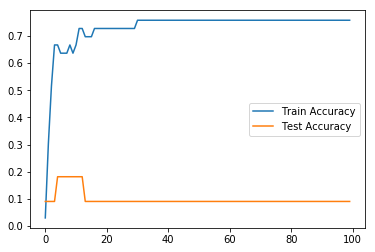

In [49]:
plt.plot(results.history['acc'], label='Train Accuracy')
plt.plot(results.history['val_acc'], label='Test Accuracy')
plt.legend();

---

---

---

In [34]:
# Import libraries and modules
import numpy as np
import pandas as pd

# For reproducibility
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from keras.utils import to_categorical # only for multiclass

%matplotlib inline

In [35]:
df = pd.read_csv('./second_train_file.csv')

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,HD Supply,Naughton Energy Corp.,Quill.com,Sanitary Solutions,Siegel Bros.,Staples,Traffic Lane Closures,Triboro Contractors Supply,Turtle & Hughes,United Rentals
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [37]:
vendor_list_fss = [
    'Action Rubber and Industrial', 'Action Rubber and Industrial', 'Action Rubber and Industrial', 'Colonial Hardware Corp.', 'Colonial Hardware Corp.',
    'Colonial Hardware Corp.', 'HD Supply', 'HD Supply', 'HD Supply', 'HD Supply',
    'HD Supply', 'HD Supply', 'HD Supply', 'Naughton Energy Corp.', 'Naughton Energy Corp.',
    'Naughton Energy Corp.', 'Naughton Energy Corp.', 'Naughton Energy Corp.', 'Naughton Energy Corp.', 'Naughton Energy Corp.',
    'Naughton Energy Corp.', 'Quill.com', 'Quill.com', 'Quill.com', 'Quill.com',
    'Quill.com', 'Quill.com', 'Quill.com', 'Quill.com', 'Sanitary Solutions',
    'Sanitary Solutions', 'Sanitary Solutions', 'Siegel Bros.', 'Siegel Bros.', 'Siegel Bros.',
    'Siegel Bros.', 'Siegel Bros.', 'Siegel Bros.', 'Siegel Bros.', 'Siegel Bros.',
    'Siegel Bros.', 'Siegel Bros.', 'Siegel Bros.', 'Siegel Bros.', 'Staples',
    'Staples', 'Staples', 'Staples', 'Staples', 'Staples',
    'Staples', 'Traffic Lane Closures', 'Traffic Lane Closures', 'Traffic Lane Closures', 'Traffic Lane Closures',
    'Traffic Lane Closures', 'Traffic Lane Closures', 'Traffic Lane Closures', 'Triboro Contractors Supply', 'Triboro Contractors Supply',
    'Triboro Contractors Supply', 'Triboro Contractors Supply', 'Triboro Contractors Supply', 'Turtle & Hughes', 'Turtle & Hughes',
    'Turtle & Hughes', 'Turtle & Hughes', 'United Rentals', 'United Rentals', 'United Rentals',
    'United Rentals', 'United Rentals', 'United Rentals'
]

In [38]:
vendor_list_fss = list(set(vendor_list_fss))

In [39]:
vendor_list_fss

['Action Rubber and Industrial',
 'Turtle & Hughes',
 'Siegel Bros.',
 'Quill.com',
 'HD Supply',
 'Colonial Hardware Corp.',
 'Sanitary Solutions',
 'Traffic Lane Closures',
 'Naughton Energy Corp.',
 'Staples',
 'United Rentals',
 'Triboro Contractors Supply']

In [40]:
dummies_list = vendor_list_fss

In [41]:
dummies_list.append('file_name')

In [42]:
features = []

In [43]:
[features.append(i) for i in list(df.columns) if i not in dummies_list]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [44]:
df[features].head()

,0,1,2,3,4,5,6,7,8,9,...,155390,155391,155392,155393,155394,155395,155396,155397,155398,155399
0,255,255,255,255,255,255,255,255,255,255,...,255,254,253,253,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,253,253,254,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,254,254,254,254,254,253,255,255,255


In [45]:
dummies_list.remove('file_name')

In [46]:
df[dummies_list].head()

,Action Rubber and Industrial,Turtle & Hughes,Siegel Bros.,Quill.com,HD Supply,Colonial Hardware Corp.,Sanitary Solutions,Traffic Lane Closures,Naughton Energy Corp.,Staples,United Rentals,Triboro Contractors Supply
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
X = df[features]
y = df[dummies_list]

In [126]:
dummies_list

['Action Rubber and Industrial',
 'Turtle & Hughes',
 'Siegel Bros.',
 'Quill.com',
 'HD Supply',
 'Colonial Hardware Corp.',
 'Sanitary Solutions',
 'Traffic Lane Closures',
 'Naughton Energy Corp.',
 'Staples',
 'United Rentals',
 'Triboro Contractors Supply']

In [48]:
X /= 255

In [49]:
len(y.columns)

12

---

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [28]:
model = Sequential()

model.add(Dense(12, input_dim=X_train_sc.shape[1], activation='relu'))

model.add(Dense(20_000, activation='relu'))

#model.add(Dense(10, activation='relu'))

model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

results = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 54 samples, validate on 19 samples
Epoch 1/100
54/54 [==============================] - 1s 20ms/step - loss: 3.2789 - acc: 0.1111 - val_loss: 2.4017 - val_acc: 0.2632
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 3.4891 - acc: 0.3889 - val_loss: 1.5669 - val_acc: 0.4737
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 2.7642 - acc: 0.4259 - val_loss: 1.7252 - val_acc: 0.5263
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 2.5437 - acc: 0.6111 - val_loss: 2.0154 - val_acc: 0.5263
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 2.5053 - acc: 0.6296 - val_loss: 2.2572 - val_acc: 0.5263
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 2.4722 - acc: 0.6296 - val_loss: 2.4155 - val_acc: 0.5263
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 2.4464 - acc: 0.6296 - val_loss: 2.5090 - val_acc: 0.5263
Epoch 8/100
54/54 [===================

Epoch 63/100
54/54 [==============================] - 0s 6ms/step - loss: 2.1804 - acc: 0.6296 - val_loss: 1.9006 - val_acc: 0.5789
Epoch 64/100
54/54 [==============================] - 0s 6ms/step - loss: 2.1799 - acc: 0.6296 - val_loss: 1.9032 - val_acc: 0.5789
Epoch 65/100
54/54 [==============================] - 0s 6ms/step - loss: 2.1787 - acc: 0.6296 - val_loss: 1.9013 - val_acc: 0.5789
Epoch 66/100
54/54 [==============================] - 0s 6ms/step - loss: 2.1803 - acc: 0.6296 - val_loss: 1.8884 - val_acc: 0.5789
Epoch 67/100
54/54 [==============================] - 0s 5ms/step - loss: 2.1806 - acc: 0.6296 - val_loss: 1.8820 - val_acc: 0.5789
Epoch 68/100
54/54 [==============================] - 0s 6ms/step - loss: 2.1797 - acc: 0.6296 - val_loss: 1.8787 - val_acc: 0.5789
Epoch 69/100
54/54 [==============================] - 0s 6ms/step - loss: 2.1798 - acc: 0.6296 - val_loss: 1.8720 - val_acc: 0.5789
Epoch 70/100
54/54 [==============================] - 0s 6ms/step - loss: 2.

In [52]:
model = Sequential()

model.add(Dense(12, input_dim=X_train_sc.shape[1], activation='relu'))

model.add(Dense(2_000, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

results = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 54 samples, validate on 19 samples
Epoch 1/100
54/54 [==============================] - 1s 22ms/step - loss: 2.4585 - acc: 0.1111 - val_loss: 3.2782 - val_acc: 0.1053
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 2.1723 - acc: 0.1667 - val_loss: 4.1950 - val_acc: 0.0526
Epoch 3/100
54/54 [==============================] - 0s 7ms/step - loss: 2.1227 - acc: 0.2222 - val_loss: 4.1563 - val_acc: 0.1579
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 1.8296 - acc: 0.2222 - val_loss: 4.1704 - val_acc: 0.1579
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 1.7852 - acc: 0.2222 - val_loss: 4.1480 - val_acc: 0.1579
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 1.7240 - acc: 0.2407 - val_loss: 4.1777 - val_acc: 0.1579
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 1.6372 - acc: 0.2778 - val_loss: 4.2928 - val_acc: 0.1579
Epoch 8/100
54/54 [===================

Epoch 63/100
54/54 [==============================] - 0s 5ms/step - loss: 0.8102 - acc: 0.7222 - val_loss: 3.7088 - val_acc: 0.5263
Epoch 64/100
54/54 [==============================] - 0s 6ms/step - loss: 0.8088 - acc: 0.6667 - val_loss: 3.7061 - val_acc: 0.4737
Epoch 65/100
54/54 [==============================] - 0s 5ms/step - loss: 0.8063 - acc: 0.6296 - val_loss: 3.7005 - val_acc: 0.5263
Epoch 66/100
54/54 [==============================] - 0s 5ms/step - loss: 0.8021 - acc: 0.6852 - val_loss: 3.6962 - val_acc: 0.5263
Epoch 67/100
54/54 [==============================] - 0s 5ms/step - loss: 0.7994 - acc: 0.7222 - val_loss: 3.6972 - val_acc: 0.5263
Epoch 68/100
54/54 [==============================] - 0s 5ms/step - loss: 0.7964 - acc: 0.7222 - val_loss: 3.7035 - val_acc: 0.5263
Epoch 69/100
54/54 [==============================] - 0s 5ms/step - loss: 0.7921 - acc: 0.7037 - val_loss: 3.7112 - val_acc: 0.5263
Epoch 70/100
54/54 [==============================] - 0s 5ms/step - loss: 0.

In [120]:
###
model = Sequential()

model.add(Dense(12, input_dim=X_train_sc.shape[1], activation='relu'))

model.add(Dense(2_000, activation='relu'))

model.add(Dense(1_000, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

results = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 54 samples, validate on 19 samples
Epoch 1/100
54/54 [==============================] - 4s 80ms/step - loss: 2.4287 - acc: 0.1481 - val_loss: 2.3732 - val_acc: 0.3684
Epoch 2/100
54/54 [==============================] - 0s 7ms/step - loss: 3.2979 - acc: 0.4444 - val_loss: 3.0470 - val_acc: 0.2105
Epoch 3/100
54/54 [==============================] - 0s 7ms/step - loss: 5.6468 - acc: 0.2593 - val_loss: 1.8747 - val_acc: 0.4737
Epoch 4/100
54/54 [==============================] - 0s 7ms/step - loss: 3.2112 - acc: 0.3333 - val_loss: 2.1063 - val_acc: 0.3158
Epoch 5/100
54/54 [==============================] - 0s 7ms/step - loss: 2.6995 - acc: 0.4074 - val_loss: 1.9662 - val_acc: 0.4737
Epoch 6/100
54/54 [==============================] - 0s 7ms/step - loss: 2.3560 - acc: 0.5370 - val_loss: 1.7690 - val_acc: 0.4737
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 2.1933 - acc: 0.6111 - val_loss: 1.7502 - val_acc: 0.4737
Epoch 8/100
54/54 [===================

Epoch 63/100
54/54 [==============================] - 0s 7ms/step - loss: 1.7229 - acc: 0.8148 - val_loss: 1.7654 - val_acc: 0.6316
Epoch 64/100
54/54 [==============================] - 0s 7ms/step - loss: 1.7182 - acc: 0.8148 - val_loss: 1.7180 - val_acc: 0.6316
Epoch 65/100
54/54 [==============================] - 0s 7ms/step - loss: 1.7137 - acc: 0.8148 - val_loss: 1.6686 - val_acc: 0.6316
Epoch 66/100
54/54 [==============================] - 0s 7ms/step - loss: 1.7107 - acc: 0.8148 - val_loss: 1.6285 - val_acc: 0.6316
Epoch 67/100
54/54 [==============================] - 0s 7ms/step - loss: 1.7067 - acc: 0.8148 - val_loss: 1.6231 - val_acc: 0.6316
Epoch 68/100
54/54 [==============================] - 0s 7ms/step - loss: 1.7042 - acc: 0.8148 - val_loss: 1.6201 - val_acc: 0.6316
Epoch 69/100
54/54 [==============================] - 0s 7ms/step - loss: 1.7005 - acc: 0.8148 - val_loss: 1.6287 - val_acc: 0.6316
Epoch 70/100
54/54 [==============================] - 0s 7ms/step - loss: 1.

In [132]:
preds = model.predict(X_test_sc)

In [135]:
np.argmax(preds[1])

6

In [137]:
preds[1]

array([2.6753470e-01, 2.6311067e-01, 2.0913209e-05, 9.8831626e-04,
       3.2084221e-03, 1.6144650e-01, 2.9636911e-01, 6.0128776e-04,
       1.3693555e-03, 4.8350138e-03, 5.1094423e-04, 4.8587926e-06],
      dtype=float32)

In [127]:
dummies_list

['Action Rubber and Industrial',
 'Turtle & Hughes',
 'Siegel Bros.',
 'Quill.com',
 'HD Supply',
 'Colonial Hardware Corp.',
 'Sanitary Solutions',
 'Traffic Lane Closures',
 'Naughton Energy Corp.',
 'Staples',
 'United Rentals',
 'Triboro Contractors Supply']

In [125]:
preds[0]

array([3.1288531e-15, 3.5121764e-07, 9.9999952e-01, 7.3636437e-15,
       1.9407377e-19, 3.6034972e-13, 2.4146603e-12, 6.6469660e-08,
       7.6198341e-13, 1.0221815e-09, 1.9579158e-18, 3.3198907e-22],
      dtype=float32)

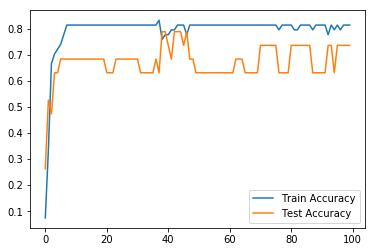

In [111]:
plt.plot(results.history['acc'], label='Train Accuracy')
plt.plot(results.history['val_acc'], label='Test Accuracy')
plt.legend();

In [ ]:
###
model = Sequential()

model.add(Dense(12, input_dim=X_train_sc.shape[1], activation='relu'))

model.add(Dense(3_200, activation='relu'))

model.add(Dense(600, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

results = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

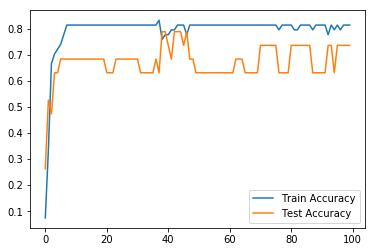

In [111]:
plt.plot(results.history['acc'], label='Train Accuracy')
plt.plot(results.history['val_acc'], label='Test Accuracy')
plt.legend();